# **Vessel Boost Toolbox**
## Module - inference.py
Vessel Boost toolbox provides an inference module which allows you to use your own trained models or our provided models to make inference on your data images.

### Pre-trianed models promptly available on OSF
We are currently provide 3 pre-trained models, you can download them to make infetence on your images by running the following cell:\
\
When doing in on Terminal, you could run the following code to create a path to save our provided pre-trained models. While in this tutorial notebook, we used Python os library to change work directory.


```bash
mkdir ./../saved_models
cd ./../saved_models/

# Each line of code below corresponds to a pre-trained model provide by us
osf -p abk4p fetch /pretrained_models/manual_ep5000_0621
osf -p abk4p fetch /pretrained_models/om1_ep5000_0711
osf -p abk4p fetch /pretrained_models/om2_ep5000_0711
```


In [1]:
import os
os.chdir('./../saved_models/')

!osf -p abk4p fetch /pretrained_models/manual_ep5000_0621
# !osf -p abk4p fetch /pretrained_models/om1_ep5000_0711
# !osf -p abk4p fetch /pretrained_models/om2_ep5000_0711

100%|███████████████████████████████████| 26.4M/26.4M [00:00<00:00, 127Mbytes/s]


For this example notebook, we also provide a public MR image data to demonstrate the output results:

In [2]:
# Download the data
!osf -p nr6gc fetch /osfstorage/twoEchoTOF/raw/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32.nii ./../../data/img/example_image.nii

100%|█████████████████████████████████████| 327M/327M [00:01<00:00, 182Mbytes/s]


### Without preprocessing 
If you set argument *-prep_mode* to 4, then no preprocessing (N4 bias field correction, denoising) will happen, and you don't need to set a path specificly to store the preprocessed images:

In [3]:
!python ./../inference.py --ds_path ./../../data/img/ --out_path ./../../data/generated_label/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 4

./../../data/generated_label/ does not exist.
./../../data/generated_label/ has been created!
Inference session will start shortly..
Aborting the preprocessing procedure!

Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [01:12<00:00, 12.13s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed example_image.nii is successfully saved!

Output MIP image example_image.nii is successfully saved!

Prediction and thresholding procedure end!



Vessel Boost will generate both .nii segmentation file and its maximum intensity projection (.jpg). View the maximum intensity projection of the generated segmentation:

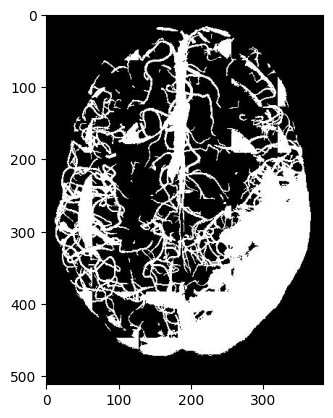

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./../../data/generated_label/example_image.jpg")
plt.imshow(mip_image, cmap='gray')

### With preprocessing

If you set prep_mode to 1,2 or 3, which means both or one of denosing and N4 bias field correction will happen, then you have to set a path to store the preprocessed images e.g. *-ps_path ./data/preprocessed/*

In [5]:
!python ./../inference.py --ds_path ./../../data/img/ --ps_path ./../../data/preprocessed/ --out_path ./../../data/generated_label_2/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 1

./../../data/generated_label_2/ does not exist.
./../../data/generated_label_2/ has been created!
Inference session will start shortly..
The preprocessing procedure is starting!

100%|████████████████████████████████████████████| 1/1 [03:15<00:00, 195.02s/it]
All processed images are successfully saved!
Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [01:12<00:00, 12.03s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed example_image.nii is successfully saved!

Output MIP image example_image.nii is successfully saved!

Prediction and thresholding procedure end!



MIP image:

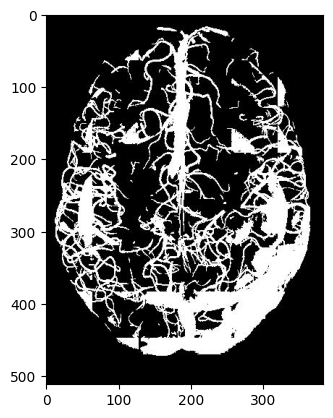

In [6]:
mip_image = img.imread("./../../data/generated_label_2/example_image.jpg")
plt.imshow(mip_image, cmap='gray')